## Importing required packages 

In [1]:
import missingno, fancyimpute
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split

C:\Users\pranavi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Reading data

In [2]:
data=pd.read_csv("C:/Users/pranavi/Desktop/StockData/GOOG.csv")

### Data frame

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,27-02-2018,1141.239990,1144.040039,1118.000000,1118.290039,1118.290039,1774100
1,28-02-2018,1123.030029,1127.530029,1103.239990,1104.729980,1104.729980,1882600
2,01-03-2018,1107.869995,1110.119995,1067.000977,1069.520020,1069.520020,2515900
3,02-03-2018,1053.079956,1081.999023,1048.114990,1078.920044,1078.920044,2271600
4,05-03-2018,1075.140015,1097.099976,1069.000000,1090.930054,1090.930054,1202200


### Shape of Data

In [4]:
data.shape

(251, 7)

### Data types 

In [5]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

## Missing valuse Analysis 

### Count of  missing values in each variable 

In [7]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Matrix plot of Missing values 

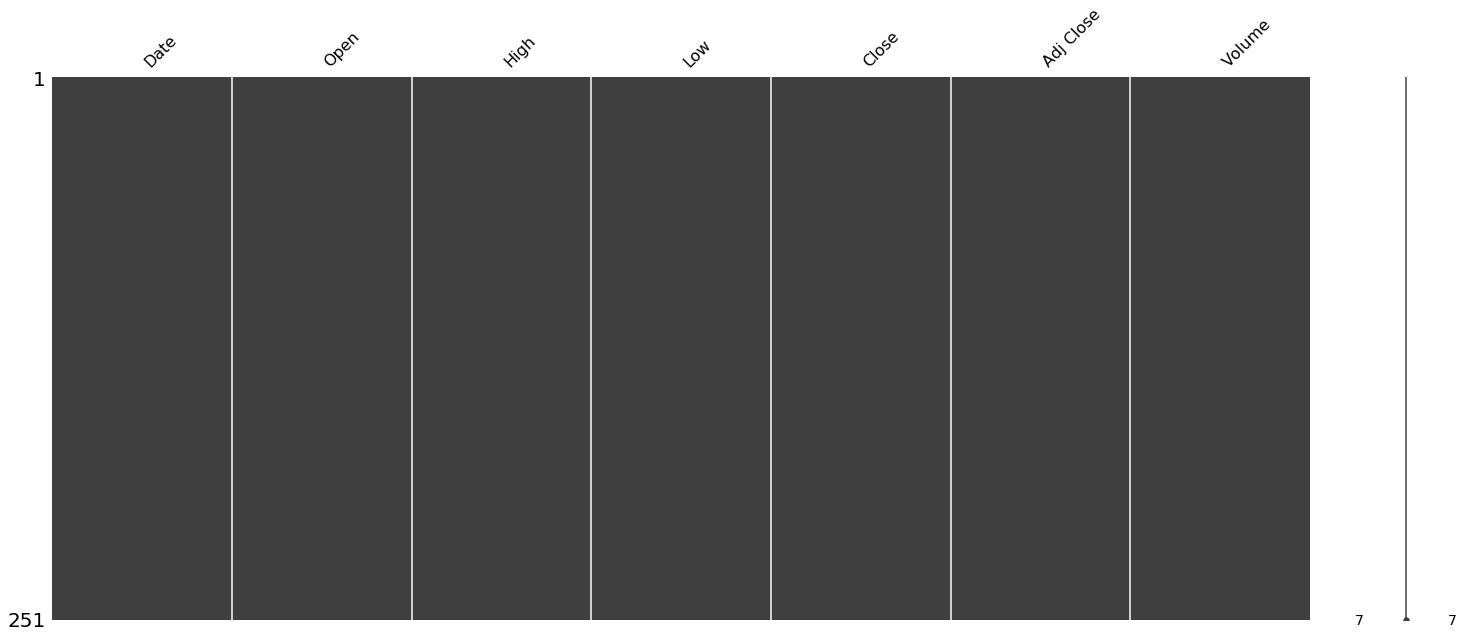

In [6]:
missingno.matrix(data)

### from the count and matrix plot it is clear that there are no missing value 

## Univariate Analysis

### In univariate analysis we plot graphs for each variable and check the spread of data points as the data considered is completely numerical so we go with boxplot to understand the particular variables in the consider dataset  

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac343429e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac3434c2e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac34342898>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac3434cb38>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac3434cf60>],
 'means': []}

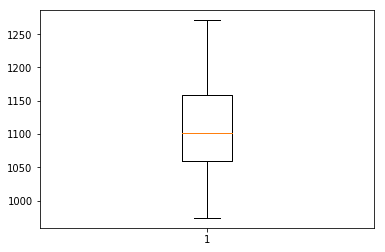

In [9]:
plt.boxplot(data['Open'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac343a6400>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac343a6cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac343a62b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac343ae550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac343ae978>],
 'means': []}

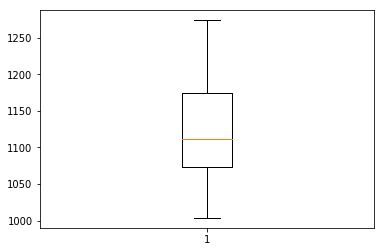

In [10]:
plt.boxplot(data['High'])

### There are no outliers and the first quartile has more dense of data points compared to the fourth and third quartiels 

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac344570b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac34457978>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac34450f28>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac34464208>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac34464630>],
 'means': []}

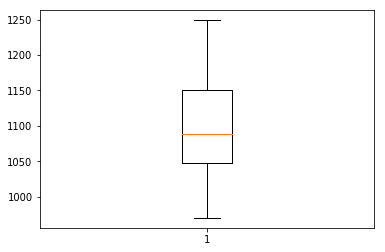

In [12]:
plt.boxplot(data['Low'])

### There are no outliers and the first quartile has more dense of data points compared to the fourth and third quartiels 

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac344b05c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac344b0e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac344b0470>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac344b7710>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac344b7b38>],
 'means': []}

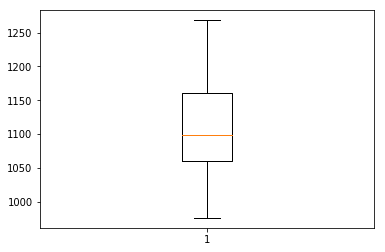

In [13]:
plt.boxplot(data['Close'])

### There are no outliers and the first quartile has more dense of data points compared to the fourth and third quartiels 

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac34507940>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac34510240>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac345077f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac34510a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac34510eb8>],
 'means': []}

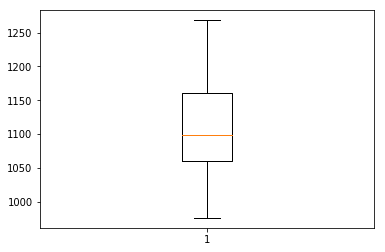

In [14]:
plt.boxplot(data['Adj Close'])

### There are no outliers and the first quartile has more dense of data points compared to the fourth and third quartiels 

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac35d9ff98>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac35da6898>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac35d9fe48>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac35dae128>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac35dae550>],
 'means': []}

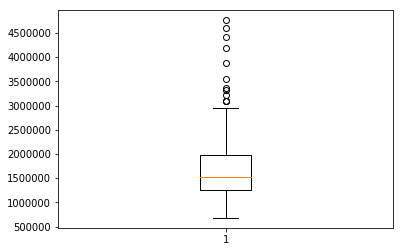

In [16]:
plt.boxplot(data['Volume'])

### First, second and third quartiles have data points very close to each and the data points in fourh quartiles has a little scattered points. There are few outliers with higher values.

### As the taken dataset is continous data all the variables are dependent on each other, giving similar kind of results 

### Adding an extra column to analyse the data

In [18]:
data['Open/Close']=data['Open']-data['Close']

In [21]:
data['Open/Close']

0      22.949951
1      18.300049
2      38.349975
3     -25.840088
4     -15.790039
5       4.159912
6     -20.450074
7     -10.680054
8     -24.040039
9      -0.650024
10     31.829956
11     -4.280029
12      0.380005
13     18.410035
14     20.190064
15      1.290039
16      1.859985
17     32.800049
18     25.460022
19     -7.209961
20     57.900024
21     -6.559998
22    -20.160034
23     16.350036
24      0.500000
25    -31.730042
26     13.519897
27     12.960022
28      1.349976
29     -5.200074
         ...    
221     2.230103
222   -26.979980
223    -0.969971
224   -10.430053
225     1.739990
226    17.479980
227     1.780030
228     2.579956
229    -5.989990
230    10.030029
231    12.060059
232   -20.630005
233   -13.369995
234     1.650024
235   -20.140015
236   -21.150024
237    24.339966
238     5.450073
239    -8.060059
240     1.939941
241   -14.569946
242     4.829956
243    -3.619995
244    16.429932
245    -8.560059
246     6.189941
247    13.869995
248    -9.4699

### This gives the difference between open and close using which we can exclude alll other variables 

In [22]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open/Close
0,27-02-2018,1141.239990,1144.040039,1118.000000,1118.290039,1118.290039,1774100,22.949951
1,28-02-2018,1123.030029,1127.530029,1103.239990,1104.729980,1104.729980,1882600,18.300049
2,01-03-2018,1107.869995,1110.119995,1067.000977,1069.520020,1069.520020,2515900,38.349975
3,02-03-2018,1053.079956,1081.999023,1048.114990,1078.920044,1078.920044,2271600,-25.840088
4,05-03-2018,1075.140015,1097.099976,1069.000000,1090.930054,1090.930054,1202200,-15.790039


## Bivariate Analysis

### As the data is continouse type , we compare the only independent variabel Volume with the rest of the variables 

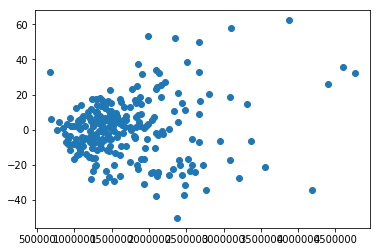

In [24]:
plt.scatter(data['Volume'],data['Open/Close'])

### The scatter plot is plotted between Volume and Open/Close (which cover all other dependent variables) from the plot we can see that there is very less linear relation.| 

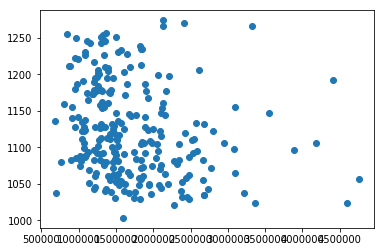

In [25]:
plt.scatter(data['Volume'],data['High'])

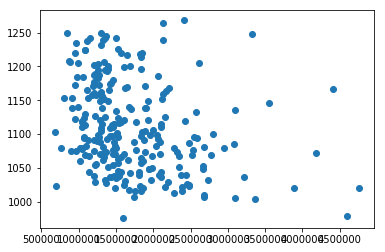

In [29]:
plt.scatter(data['Volume'],data['Adj Close'])

## Correlation 

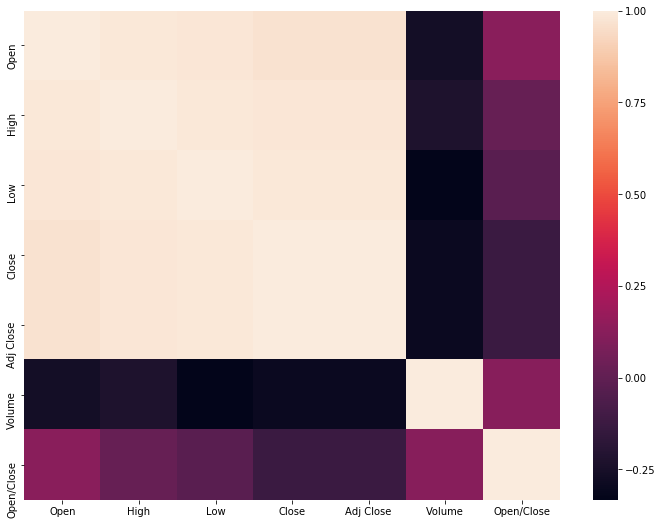

In [31]:
import seaborn as sns
corrmat=data.corr()
f, ax=plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat);

### The correlation matrix gives the relationship between the all the variables and we can see all the variables except Volume are strongly correlated with each other as it is a continouse and dependent variables

## Features selection

### The dataset considered is Time series analysis dataset when we are building a model for time series all the variables are nedded to be considered as each variable contributes equal lecel of importance in the process of building the model